<a href="https://colab.research.google.com/github/rafaelspenna/mestrado_LSTM_1/blob/master/LSTM_BOVA11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Prever o preço de fechamento do índice Bovespa no próximo pregão através de redes LSTM, utilizando os útimos 15 dias dos preços de fechamento.

In [ ]:
#Importing libraries
import math     
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
df = web.DataReader('^BVSP', data_source='yahoo', start='1995-06-01', end='2020-01-30')
len(df)

6105

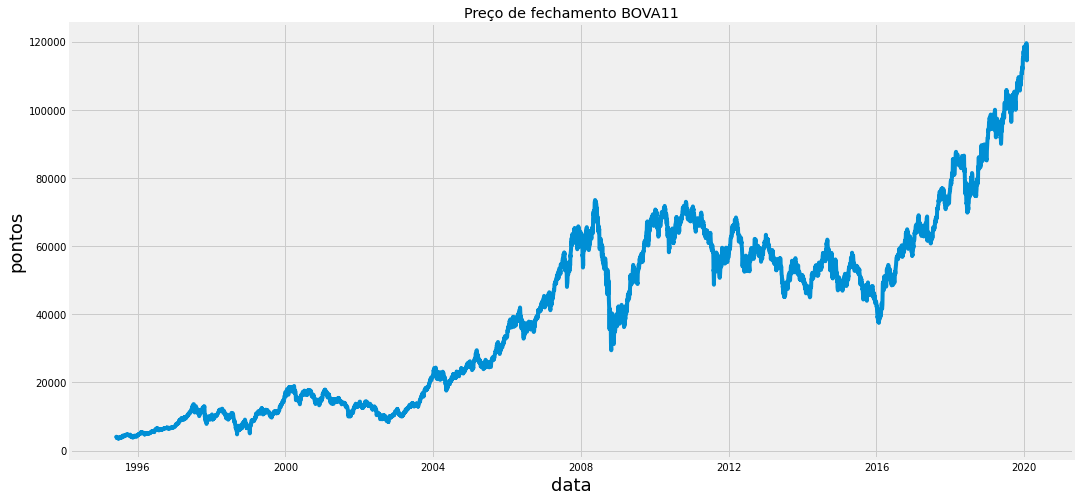

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Preço de fechamento BOVA11")
plt.plot(df['Adj Close'])
plt.xlabel('data', fontsize=18)
plt.ylabel('pontos', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe only with Close Column
data = df.filter(['Adj Close'])
#Convert data to a numpy array
dataset = data.values
#Separete training and test data
training_data_length = math.ceil(len(dataset)*0.8)

training_data_length

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

In [ ]:
#Create training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_length , :]
#Split data between x_train and y_train
x_train =[]
y_train =[]
batch_size = 15

for i in range(batch_size, len(train_data)):
    x_train.append(train_data[i-batch_size:i, 0])
    y_train.append(train_data[i,0])
    if i <= batch_size:
        print(x_train)
        print(y_train)
        print()

[array([0.00203981, 0.00370287, 0.00453311, 0.00341664, 0.00233811])]
[0.0024269124328611703]



In [ ]:
#Convert x_train and y_train to a numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(4879, 5, 1)

In [ ]:
#Build LSTM model
model = Sequential()
model.add(LSTM(150,return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(150))
model.add(Dense(1))

In [ ]:
x_train.shape[1]

5

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') 

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=30)

Epoch 1/30
4879/4879 [==============================] - 42s 9ms/step - loss: 3.8461e-04
Epoch 2/30
4879/4879 [==============================] - 41s 8ms/step - loss: 1.7372e-04
Epoch 3/30
4879/4879 [==============================] - 40s 8ms/step - loss: 1.2028e-04
Epoch 4/30
4879/4879 [==============================] - 41s 8ms/step - loss: 1.0247e-04
Epoch 5/30
4879/4879 [==============================] - 40s 8ms/step - loss: 8.8933e-05
Epoch 6/30
4879/4879 [==============================] - 41s 8ms/step - loss: 7.9846e-05
Epoch 7/30
4879/4879 [==============================] - 42s 9ms/step - loss: 7.6445e-05
Epoch 8/30
4879/4879 [==============================] - 41s 8ms/step - loss: 7.3017e-05
Epoch 9/30
4879/4879 [==============================] - 42s 9ms/step - loss: 7.2182e-05
Epoch 10/30
4879/4879 [==============================] - 42s 9ms/step - loss: 6.7309e-05
Epoch 11/30
4879/4879 [==============================] - 43s 9ms/step - loss: 6.6427e-05
Epoch 12/30
4879/4879 [=======

In [ ]:
#Creating the test dataset
test_data = scaled_data[training_data_length - batch_size: , : ]

x_test = []
y_test = dataset[training_data_length: , : ]

for i in range(batch_size, len(test_data)):
    x_test.append(test_data[i - batch_size : i , 0])

x_test = np.array(x_test)

In [ ]:
#Reshape the data for LSTM 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Model predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

1903.8914233331473

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


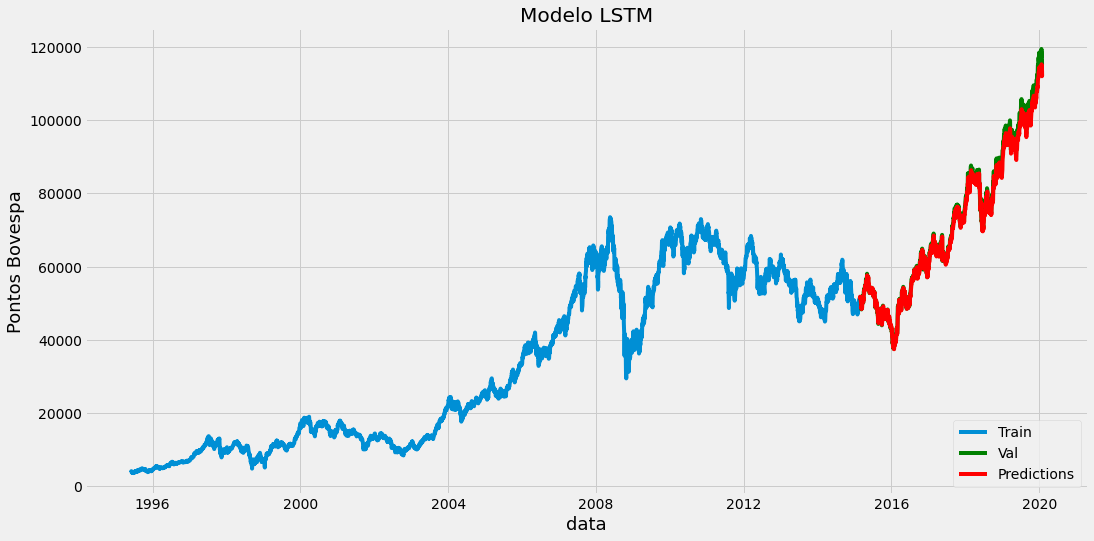

In [ ]:
#Plot 
train = data[:training_data_length]
valid = data[training_data_length:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Modelo LSTM')
plt.xlabel('data', fontsize=18)
plt.ylabel('Pontos Bovespa', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close']], color = 'green')
plt.plot(valid[['Predictions']], color = 'red')
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()



In [ ]:
#Show the matrix containing the actual values and predicted values
valid

,Adj Close,Predictions
Date,,
2015-02-24,51874.0,51154.109375
2015-02-25,51811.0,51785.226562
2015-02-26,51761.0,51592.636719
2015-02-27,51583.0,51656.691406
2015-03-02,51021.0,51459.035156
...,...,...
2020-01-24,118376.0,115337.921875
2020-01-27,114482.0,114806.343750
2020-01-28,116479.0,112065.484375


In [ ]:
valid_diff  = valid.diff()

In [ ]:
teste = valid_diff['Adj Close'] * valid_diff['Predictions']

days_pred_correct = 0

for i in teste:
    if i > 0:
        days_pred_correct += 1

print(days_pred_correct / len(valid))


0.48976248976248976
